In [1]:
%pylab inline
import numpy as np
from scipy.constants import mu_0, epsilon_0
import matplotlib
matplotlib.rcParams["font.size"] = 14
from ipywidgets import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getReflectionandTransmission(sig1, sig2, f, theta_i, eps1=epsilon_0, eps2=epsilon_0, mu1=mu_0, mu2=mu_0,dtype="TE"):
    """
    Compute reflection and refraction coefficient of plane waves
    """
    theta_i = np.deg2rad(theta_i)
    omega = 2*np.pi*f
    
    k1 = np.sqrt(omega**2*mu1*eps1-1j*omega*mu1*sig1)
    k2 = np.sqrt(omega**2*mu2*eps2-1j*omega*mu2*sig2)
    
    if dtype == "TE":
        bunmo = mu2*k1*np.cos(theta_i) + mu1*(k2**2-k1**2*np.sin(theta_i)**2)**0.5
        bunja_r = mu2*k1*np.cos(theta_i) - mu1*(k2**2-k1**2*np.sin(theta_i)**2)**0.5
        bunja_t = 2*mu2*k1*np.cos(theta_i)
    elif dtype == "TM":
        bunmo = mu2*k1*(k2**2-k1**2*np.sin(theta_i)**2)**0.5 + mu1*k2**2 * np.cos(theta_i)
        bunja_r = mu2*k1*(k2**2-k1**2*np.sin(theta_i)**2)**0.5 - mu1*k2**2 * np.cos(theta_i)
        bunja_t = 2*mu1*k2**2*np.cos(theta_i)        
    else:
        raise Exception("XXX")
    
    r = bunja_r / bunmo
    t = bunja_t / bunmo
    
    theta_t = np.rad2deg(abs(np.arcsin(k1/k2 * np.sin(theta_i))))
    return r, t, theta_t

In [3]:
sig1, sig2 = 0., 3.
f = 6e6
theta_i = 30.
rTE, tTE, theta_t_TE = getReflectionandTransmission(sig1, sig2, f, theta_i, dtype="TE")
rTM, tTM, theta_t_TM = getReflectionandTransmission(sig1, sig2, f, theta_i, dtype="TM")

In [4]:
# Safety check
print tTE - rTE
print tTM + rTM

(1+6.76542155631e-17j)
(1+0j)


In [5]:
def PowerReflection(sig1, sig2, f, Type):
    theta_i = np.linspace(0, 90, 181)
    rTE, tTE, theta_t_TE = getReflectionandTransmission(sig1, sig2, f, theta_i, dtype="TE")
    rTM, tTM, theta_t_TM = getReflectionandTransmission(sig1, sig2, f, theta_i, dtype="TM")
    fig = plt.figure(figsize=(5,5))
    ylabel = "Percentage"

    if Type == "Reflection":
        plt.plot(theta_i, abs(rTE)**2*100, 'k', lw=2)
        plt.plot(theta_i, abs(rTM)**2*100, 'b', lw=2)
        plt.ylim(0, 110)            
        legend = ("R$_{TE}$", "R$_{TM}$")   
        plt.legend(legend, bbox_to_anchor=(1.4,1))
    elif Type == "Transmission":
        plt.plot(theta_i, 100-abs(rTE)**2*100, 'k', lw=2)
        plt.plot(theta_i, 100-abs(rTM)**2*100, 'b', lw=2)        
        plt.ylim(0, 110)        
        legend = ("T$_{TE}$", "T$_{TM}$")       
        plt.legend(legend, bbox_to_anchor=(1.4,1))
    elif Type == "Angle":
        plt.plot(theta_i, theta_t_TE, 'k', lw=2)
        plt.ylim(0, 90)
        ylabel = "Transmission angle ($| \\theta_t |$)"
        legend = None
    plt.xlim(0, 90)
    plt.grid(True)

    plt.xlabel("Incident angle ($\\theta_i$)")
    plt.ylabel(ylabel)
    pass

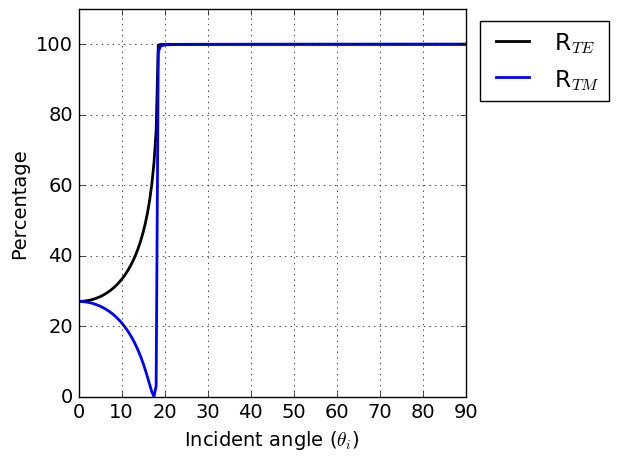

In [8]:
Q = interact(PowerReflection
        , sig1 = FloatText(value=0., description="$\sigma_1$")
        , sig2 = FloatText(value=1e-2, description="$\sigma_2$")
        , f = FloatText(value=6e5, description="$f$ (Hz)")
        , Type = ToggleButtons(options=["Reflection", "Transmission", "Angle"])
        )